# Extracting for a single year

                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2018), Delaware         9263            0    10   
1  State House District 2 (2018), Delaware         7834            0    10   
2  State House District 3 (2018), Delaware         8245            0    10   
3  State House District 4 (2018), Delaware        10137           10    10   
4  State House District 5 (2018), Delaware         8541           31    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.1  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/3375962174.py:45: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


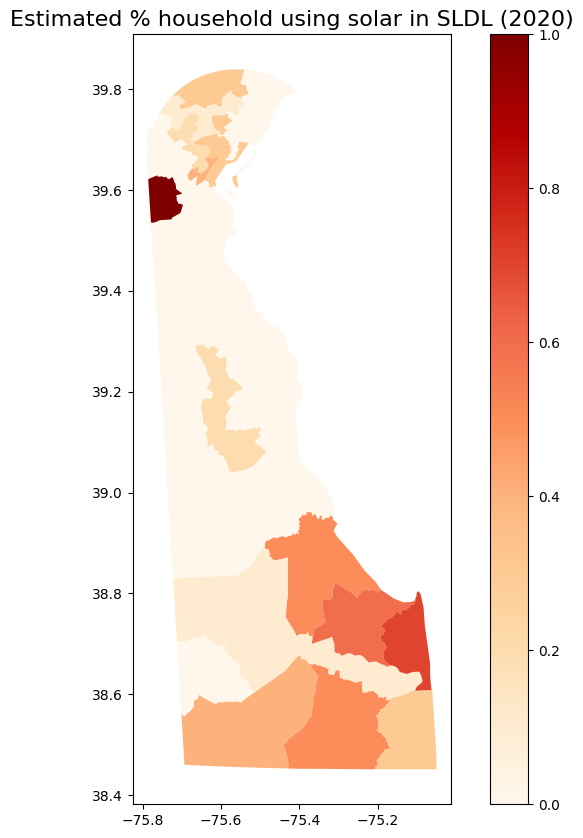

In [1]:
import requests
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the Delaware dry land shapefile as a GeoDataFrame
USmap = gpd.read_file("/Users/kamran/Downloads/Shapefiles/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

year = '2020'

usr_key = os.environ.get('CENSUS_API_KEY')

host = 'https://api.census.gov/data'
dataset_acronym = '/acs/acs5'
g = '?get='
variables = 'NAME,B25040_001E,B25040_008E'
location = '&for=state%20legislative%20district%20(lower%20chamber):*&in=state:10'

# Put it all together in one f-string:
query_url = f"{host}/{year}{dataset_acronym}{g}{variables}{location}&key={usr_key}"

response = requests.get(query_url)

# Create shapefile query URL
shape_url = f"https://www2.census.gov/geo/tiger/TIGER{year}/SLDL/tl_{year}_10_sldl.zip"

# Read the shapefile from the URL into a GeoPandas DataFrame
sldl_gdf = gpd.read_file(shape_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    
    # Convert the JSON response to a list of lists (excluding the header)
    data = response.json()[1:]
    
    # Convert the list of lists into a DataFrame
    columns = response.json()[0]  # Use the first row as column names
    api_data_df = pd.DataFrame(data, columns=columns)
    api_data_df = api_data_df.astype({'B25040_001E':'int64','B25040_008E':'int64'})
    api_data_df['Persentage of households using solar'] = round((api_data_df['B25040_008E'] / api_data_df['B25040_001E']) * 100, 1)
    print(api_data_df.head())
    
    # Spatial intersection to retain only the parts within the dry land of Delaware
    delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')
    
    # Dissolve the GeoDataFrame based on the SLDUST column to eliminate duplicates
    delaware_land_gdf_dissolved = delaware_land_gdf.dissolve(by='SLDLST', aggfunc='first')
    
    # Merge the DataFrame with the GeoDataFrame based on the common key
    output_gdf = delaware_land_gdf.merge(api_data_df, left_on="SLDLST", right_on="state legislative district (lower chamber)")
    output_gdf = output_gdf[['geometry','Persentage of households using solar','state legislative district (lower chamber)']]
    output_gdf.rename(columns={'state legislative district (lower chamber)':'District'},inplace=True)
    output_gdf = output_gdf.apply(pd.to_numeric, errors='ignore')
    
    # Save the merged GeoDataFrame as a GeoJSON file
    output_file = f"./DSHA_SolarHousehold_SLDL_all_years/SolarHousehold_SLDL_{year}.json"
    output_gdf.to_file(output_file, driver='GeoJSON')
    
    # Plot the merged GeoDataFrame with the added information from the DataFrame
    fig, ax = plt.subplots(figsize=(10, 10))
    output_gdf.plot(column="Persentage of households using solar", cmap="OrRd", legend=True, ax=ax)
    ax.set_title(f"Estimated % household using solar in SLDL ({year})", fontsize=16)
else:
    print("Error: Unable to fetch data from the API.")

plt.savefig(f"./DSHA_SolarHousehold_SLDL_all_years/solarHousehold_sldl_{year}.png", dpi=300)


# Extracting for a range of years

                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2014), Delaware         9204            9    10   
1  State House District 5 (2014), Delaware         7716            0    10   
2  State House District 2 (2014), Delaware         7637            5    10   
3  State House District 3 (2014), Delaware         7836            0    10   
4  State House District 4 (2014), Delaware        10341            0    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        005   
2                                        002   
3                                        003   
4                                        004   

   Persentage of households using solar  
0                                   0.1  
1                                   0.0  
2                                   0.1  
3                                   0.0  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2014), Delaware         9220            8    10   
1  State House District 2 (2014), Delaware         7674            5    10   
2  State House District 3 (2014), Delaware         7980            0    10   
3  State House District 4 (2014), Delaware        10006            0    10   
4  State House District 5 (2014), Delaware         7732            0    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.1  
1                                   0.1  
2                                   0.0  
3                                   0.0  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2016), Delaware         8974            0    10   
1  State House District 2 (2016), Delaware         7449            5    10   
2  State House District 3 (2016), Delaware         7802            0    10   
3  State House District 4 (2016), Delaware        10022            0    10   
4  State House District 5 (2016), Delaware         7977            0    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.0  
1                                   0.1  
2                                   0.0  
3                                   0.0  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2016), Delaware         9075            0    10   
1  State House District 2 (2016), Delaware         7335            0    10   
2  State House District 3 (2016), Delaware         7883            0    10   
3  State House District 4 (2016), Delaware        10110            0    10   
4  State House District 5 (2016), Delaware         8083            0    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                       NAME  B25040_001E  B25040_008E state  \
0   State House District 4 (2018), Delaware        10094           10    10   
1  State House District 28 (2018), Delaware         8680            0    10   
2  State House District 11 (2018), Delaware         7691            0    10   
3  State House District 32 (2018), Delaware         8928            0    10   
4  State House District 18 (2018), Delaware         9086           29    10   

  state legislative district (lower chamber)  \
0                                        004   
1                                        028   
2                                        011   
3                                        032   
4                                        018   

   Persentage of households using solar  
0                                   0.1  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                         

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                       NAME  B25040_001E  B25040_008E state  \
0   State House District 4 (2018), Delaware        10221           11    10   
1  State House District 28 (2018), Delaware         8820            0    10   
2  State House District 11 (2018), Delaware         7702            0    10   
3  State House District 32 (2018), Delaware         9134            0    10   
4  State House District 18 (2018), Delaware         9038           27    10   

  state legislative district (lower chamber)  \
0                                        004   
1                                        028   
2                                        011   
3                                        032   
4                                        018   

   Persentage of households using solar  
0                                   0.1  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                         

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2018), Delaware         9263            0    10   
1  State House District 2 (2018), Delaware         7834            0    10   
2  State House District 3 (2018), Delaware         8245            0    10   
3  State House District 4 (2018), Delaware        10137           10    10   
4  State House District 5 (2018), Delaware         8541           31    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.1  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 20 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


                                      NAME  B25040_001E  B25040_008E state  \
0  State House District 1 (2018), Delaware         9625            0    10   
1  State House District 2 (2018), Delaware         8359            0    10   
2  State House District 3 (2018), Delaware         8654            0    10   
3  State House District 4 (2018), Delaware        10962           15    10   
4  State House District 5 (2018), Delaware         8949           31    10   

  state legislative district (lower chamber)  \
0                                        001   
1                                        002   
2                                        003   
3                                        004   
4                                        005   

   Persentage of households using solar  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.1  
4                               

/Users/kamran/anaconda3/envs/census/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_70196/1728278371.py:46: UserWarning: `keep_geom_type=True` in overlay resulted in 19 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')


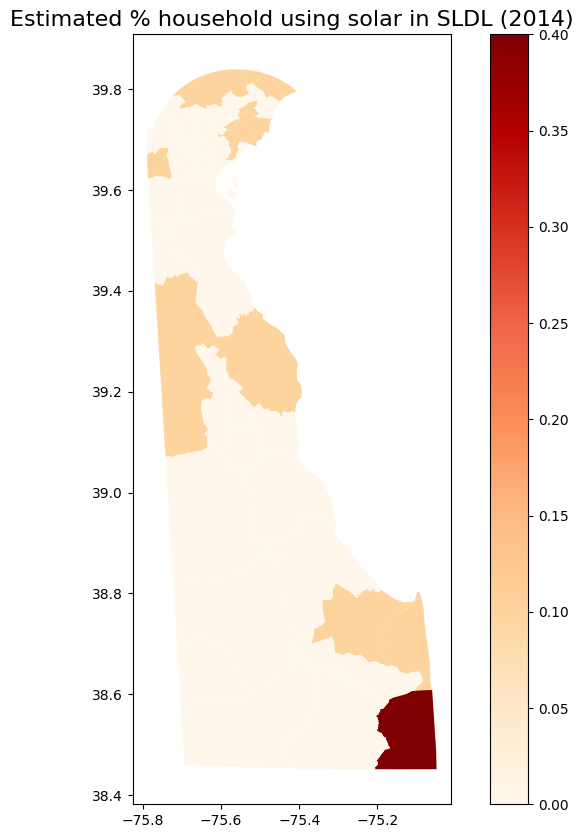

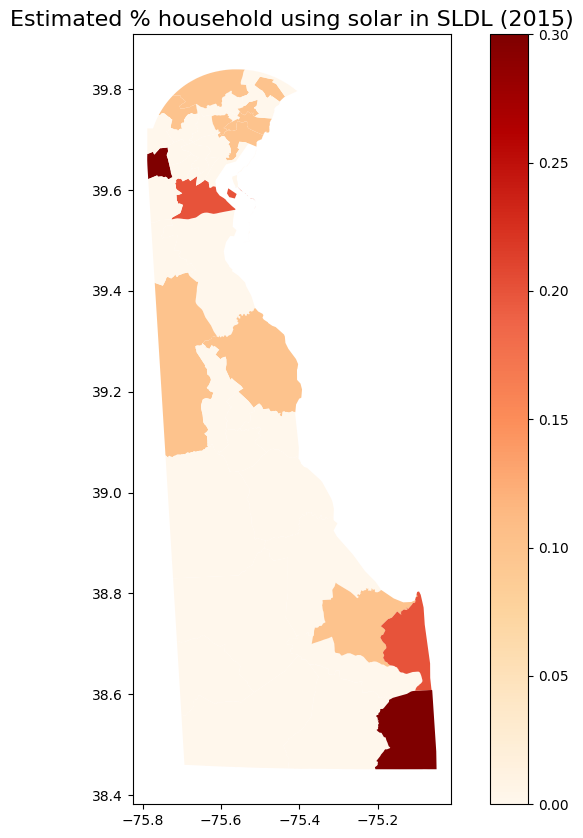

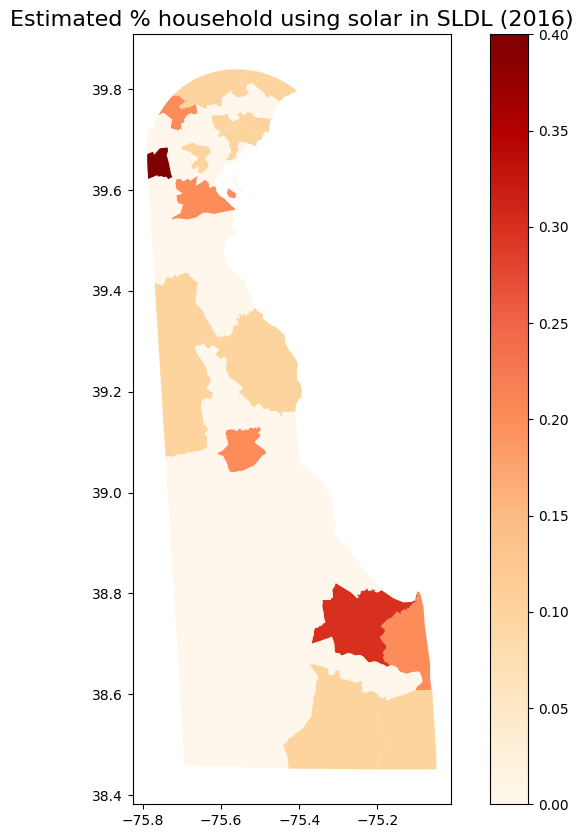

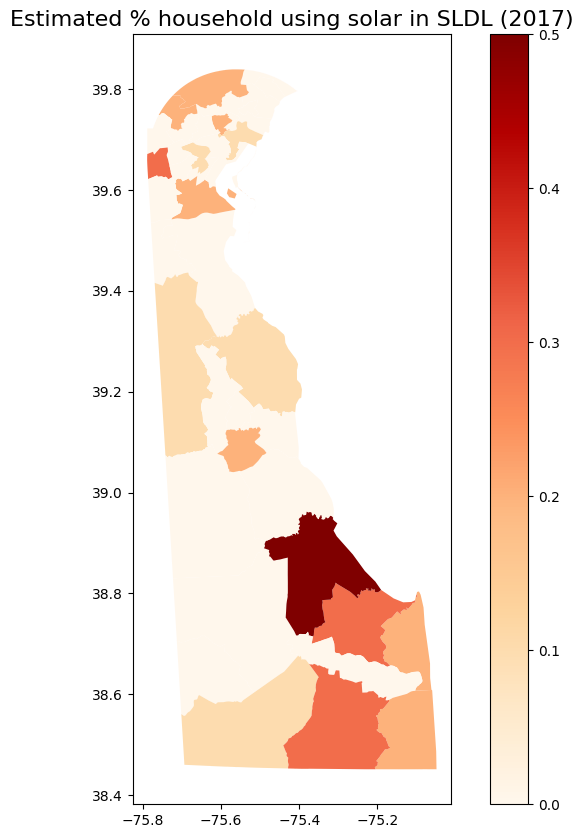

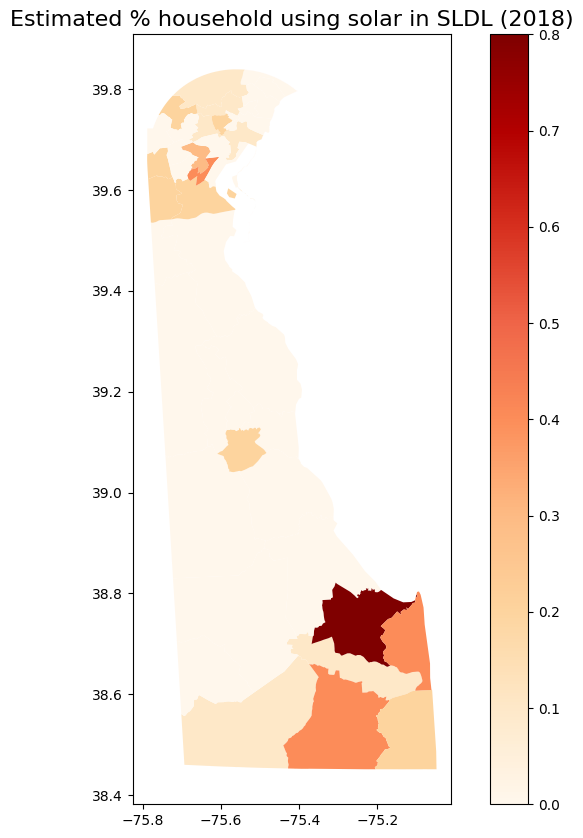

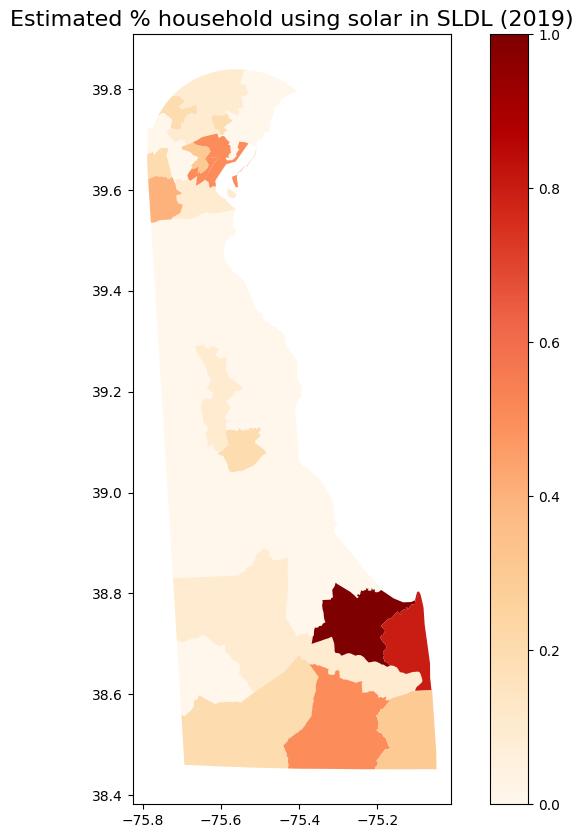

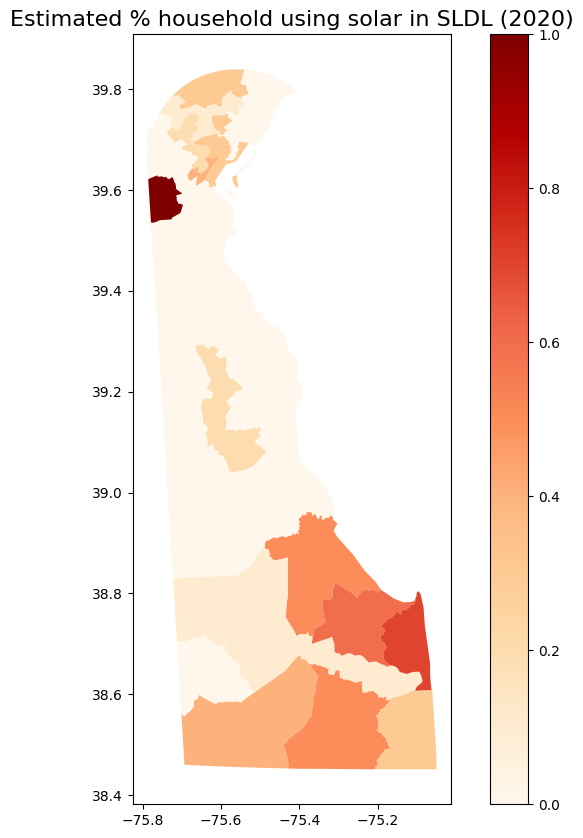

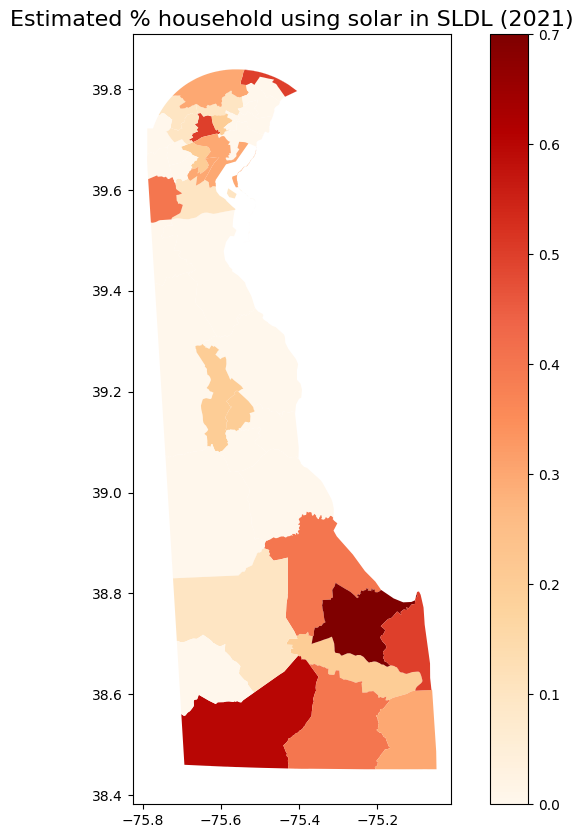

In [3]:
import requests
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the Delaware dry land shapefile as a GeoDataFrame
USmap = gpd.read_file("/Users/kamran/Downloads/Shapefiles/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

usr_key = os.environ.get('CENSUS_API_KEY')

for i in range(2014,2022):
    year = str(i)
    
    host = 'https://api.census.gov/data'
    dataset_acronym = '/acs/acs5'
    g = '?get='
    variables = 'NAME,B25040_001E,B25040_008E'
    location = '&for=state%20legislative%20district%20(lower%20chamber):*&in=state:10'

    # Put it all together in one f-string:
    query_url = f"{host}/{year}{dataset_acronym}{g}{variables}{location}&key={usr_key}"

    response = requests.get(query_url)

    # Create shapefile query URL
    shape_url = f"https://www2.census.gov/geo/tiger/TIGER{year}/SLDL/tl_{year}_10_sldl.zip"

    # Read the shapefile from the URL into a GeoPandas DataFrame
    sldl_gdf = gpd.read_file(shape_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:

        # Convert the JSON response to a list of lists (excluding the header)
        data = response.json()[1:]

        # Convert the list of lists into a DataFrame
        columns = response.json()[0]  # Use the first row as column names
        api_data_df = pd.DataFrame(data, columns=columns)
        api_data_df = api_data_df.astype({'B25040_001E':'int64','B25040_008E':'int64'})
        api_data_df['Persentage of households using solar'] = round((api_data_df['B25040_008E'] / api_data_df['B25040_001E']) * 100, 1)
        print(api_data_df.head())

        # Spatial intersection to retain only the parts within the dry land of Delaware
        delaware_land_gdf = gpd.overlay(sldl_gdf, USmap, how='intersection')

        # Dissolve the GeoDataFrame based on the SLDUST column to eliminate duplicates
        delaware_land_gdf_dissolved = delaware_land_gdf.dissolve(by='SLDLST', aggfunc='first')

        # Merge the DataFrame with the GeoDataFrame based on the common key
        output_gdf = delaware_land_gdf.merge(api_data_df, left_on="SLDLST", right_on="state legislative district (lower chamber)")
        output_gdf = output_gdf[['geometry','Persentage of households using solar','state legislative district (lower chamber)']]
        output_gdf.rename(columns={'state legislative district (lower chamber)':'District'},inplace=True)
        output_gdf = output_gdf.apply(pd.to_numeric, errors='ignore')
        
        # Save the merged GeoDataFrame as a GeoJSON file
        output_file = f"./DSHA_SolarHousehold_SLDL_all_years/SolarHousehold_SLDL_{year}.json"
        output_gdf.to_file(output_file, driver='GeoJSON')

        # Plot the merged GeoDataFrame with the added information from the DataFrame
        fig, ax = plt.subplots(figsize=(10, 10))
        output_gdf.plot(column="Persentage of households using solar", cmap="OrRd", legend=True, ax=ax)
        ax.set_title(f"Estimated % household using solar in SLDL ({year})", fontsize=16)
    else:
        print("Error: Unable to fetch data from the API.")

    plt.savefig(f"./DSHA_SolarHousehold_SLDL_all_years/solarHousehold_sldl_{year}.png", dpi=300)
